In [1]:
## Chargement et exploration initiale de la dataset.

import pandas as pd
import numpy as np 
import os

# Get a list of all .csv files in the current directory
csv_files = [file for file in os.listdir('.') if file.endswith('.csv')]

# Create a dictionary to store DataFrames with corresponding names for each .csv file
dfs = {}

# Read each .csv file, rename the DataFrame, and store it in the dictionary
for file_name in csv_files:
    df_name = file_name.replace('.csv', '')  # Extract DataFrame name from the file name
    dfs[df_name] = pd.read_csv(file_name)  # Create DataFrame with the extracted name

# Perform the merge based on a common key (e.g., 'common_column')
# Replace 'common_column' with the actual column name that is common across all DataFrames
merged_df = dfs['01_occ']  # Initialize merged_df with one of the DataFrames
for df_name, df in dfs.items():
    if df_name != '01_occ':  # Skip the first DataFrame since it's already stored in merged_df
        merged_df = pd.merge(merged_df, df, on='timestamp [dd/mm/yyyy HH:MM]',how='outer' )
        # merged_df.fillna(method='ffill', inplace=True)
        # Forward-fill missing temperature values
        merged_df.fillna(method='ffill', inplace=True)


# Now you have a merged DataFrame named 'merged_df' containing data from all .csv files
nan_df = merged_df.isna()

# If there are any NaN values, the nan_df DataFrame will contain True in those positions.
# You can check if there are any NaN values in the entire DataFrame by using the any() method.
if nan_df.any().any():
    print("The DataFrame contains NaN values.")
else:
    print("The DataFrame does not contain NaN values.")


merged_df

The DataFrame does not contain NaN values.


,timestamp [dd/mm/yyyy HH:MM],ki [0:vacant 1:occupied],o1_1 [0:vacant 1:occupied],o1_2 [0:vacant 1:occupied],o1_3 [0:vacant 1:occupied],o1_4 [0:vacant 1:occupied],o1_5 [0:vacant 1:occupied],o2 [0:vacant 1:occupied],o3 [0:vacant 1:occupied],o4 [0:vacant 1:occupied],...,o1_2 [%],o2 [%],o3 [%],o4 [%],mr [%],gh [W/m2],tempOut [C],rh [%],wind speed [m/s],Wind direction [Degree] [North:0 East:90 South:180 West:270]
0,01/01/2013 00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.1,20.8,25.1,22.4,19.6,2.0,1.6,97.0,0.45,37.0
1,01/01/2013 00:15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.1,20.8,25.1,22.4,19.6,2.0,1.6,97.0,0.45,37.0
2,01/01/2013 00:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.1,20.8,25.1,22.4,19.6,2.0,1.6,97.0,0.45,37.0
3,01/01/2013 00:45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.1,20.8,25.1,22.4,19.8,2.0,1.6,97.0,0.45,37.0
4,01/01/2013 01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.3,20.8,25.1,22.4,20.1,2.0,1.2,99.0,0.82,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2013 22:45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.6,27.1,29.6,29.3,28.2,1.0,3.4,80.0,3.32,118.0
35036,31/12/2013 23:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.2,27.1,29.7,29.2,28.2,1.0,3.5,79.0,3.69,124.0
35037,31/12/2013 23:15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.2,27.1,29.4,29.0,27.9,1.0,3.5,79.0,3.69,124.0
35038,31/12/2013 23:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.7,27.1,29.0,29.0,27.8,1.0,3.5,79.0,3.69,124.0


In [3]:
print("le nombre de variables : " , merged_df.shape[1], " et ",  merged_df.shape[0], "données caprurés sur toutes l'année 2013")
merged_df.info()

le nombre de variables :  64  et  8760 données caprurés sur toutes l'année 2013
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 64 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   timestamp [dd/mm/yyyy HH:MM]                                  8760 non-null   object 
 1   ki [0:vacant 1:occupied]                                      8760 non-null   float64
 2   o1_1 [0:vacant 1:occupied]                                    8760 non-null   float64
 3   o1_2 [0:vacant 1:occupied]                                    8760 non-null   float64
 4   o1_3 [0:vacant 1:occupied]                                    8760 non-null   float64
 5   o1_4 [0:vacant 1:occupied]                                    8760 non-null   float64
 6   o1_5 [0:vacant 1:occupied]                                    8760 non-null   fl

In [4]:

# print(merged_df.info())
df_occ = pd.read_csv('01_occ.csv')

df_occ.index = pd.to_datetime(df_occ['timestamp [dd/mm/yyyy HH:MM]'])
# temp =merged_df['tempOut [C]']
# temp =df_occ['ki [0:vacant 1:occupied]']
print(df_occ)


# Resample data to hourly intervals and calculate mean
hourly_mean = temp.resample('H').mean()
print(hourly_mean)
hourly_mean.plot()
temp.describe()
hourly_mean.describe()

                             timestamp [dd/mm/yyyy HH:MM]  \
timestamp [dd/mm/yyyy HH:MM]                                
2013-01-01 00:00:00                      01/01/2013 00:00   
2013-01-01 00:15:00                      01/01/2013 00:15   
2013-01-01 00:30:00                      01/01/2013 00:30   
2013-01-01 00:45:00                      01/01/2013 00:45   
2013-01-01 01:00:00                      01/01/2013 01:00   
...                                                   ...   
2013-12-31 22:45:00                      31/12/2013 22:45   
2013-12-31 23:00:00                      31/12/2013 23:00   
2013-12-31 23:15:00                      31/12/2013 23:15   
2013-12-31 23:30:00                      31/12/2013 23:30   
2013-12-31 23:45:00                      31/12/2013 23:45   

                              ki [0:vacant 1:occupied]  \
timestamp [dd/mm/yyyy HH:MM]                             
2013-01-01 00:00:00                                0.0   
2013-01-01 00:15:00             

NameError: name 'temp' is not defined

In [25]:
# print(merged_df.info())
df_temp_in = pd.read_csv('05_temp_in.csv')

df_temp_in.index = pd.to_datetime(df_temp_in['timestamp [dd/mm/yyyy HH:MM]'])
# temp =merged_df['tempOut [C]']
# temp =df_occ['ki [0:vacant 1:occupied]']
print(df_temp_in)
temp = df_temp_in['mr [C]']
# temp.plot()

# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_temp_in['ki'] = scaler.fit_transform(df_temp_in['ki [C]'].values.reshape(-1, 1))

print(df_temp_in['temp'] )
df_temp_in['temp'] .plot()

# Resample data to hourly intervals and calculate mean
hourly_mean = temp.resample('H').mean()
print(hourly_mean)
# hourly_mean.plot()
temp.describe()
hourly_mean.describe()

                             timestamp [dd/mm/yyyy HH:MM]  ki [C]  o1_1 [C]  \
timestamp [dd/mm/yyyy HH:MM]                                                  
2013-01-01 00:00:00                      01/01/2013 00:00   23.69     23.67   
2013-01-01 00:15:00                      01/01/2013 00:15   23.69     23.66   
2013-01-01 00:30:00                      01/01/2013 00:30   23.69     23.66   
2013-01-01 00:45:00                      01/01/2013 00:45   23.69     23.65   
2013-01-01 01:00:00                      01/01/2013 01:00   23.69     23.65   
...                                                   ...     ...       ...   
2013-12-31 22:45:00                      31/12/2013 22:45   21.18     20.86   
2013-12-31 23:00:00                      31/12/2013 23:00   21.18     20.86   
2013-12-31 23:15:00                      31/12/2013 23:15   21.09     20.86   
2013-12-31 23:30:00                      31/12/2013 23:30   21.06     20.86   
2013-12-31 23:45:00                      31/12/2013 

KeyError: 'temp'

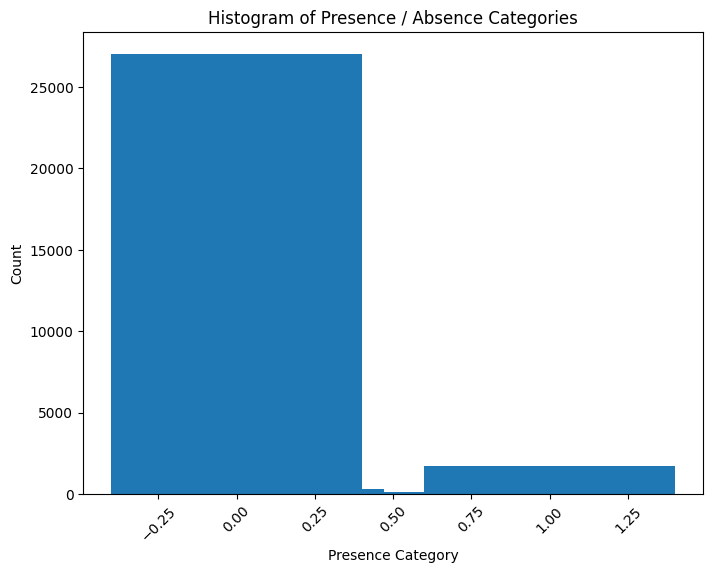

Empty DataFrame
Columns: [timestamp [dd/mm/yyyy HH:MM], ki [0:vacant 1:occupied], o1_1 [0:vacant 1:occupied], o1_2 [0:vacant 1:occupied], o1_3 [0:vacant 1:occupied], o1_4 [0:vacant 1:occupied], o1_5 [0:vacant 1:occupied], o2 [0:vacant 1:occupied], o3 [0:vacant 1:occupied], o4 [0:vacant 1:occupied]]
Index: []


In [5]:
import matplotlib.pyplot as plt

# Assuming you have the merged_df DataFrame containing the 'presence_category' column
presence_counts = df_occ['o1_1 [0:vacant 1:occupied]'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(presence_counts.index, presence_counts.values)
plt.xlabel('Presence Category')
plt.ylabel('Count')
plt.title('Histogram of Presence / Absence Categories')
plt.xticks(rotation=45)
plt.show()

print(df_occ[df_occ['o1_1 [0:vacant 1:occupied]']<0])



In [11]:
# [[1],[2],[3],[4]]=[5]
# [[2],[3],[4],[5]]=[6]

seq_length =4

# Function to create input sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])

    return np.array(X), np.array(y)

x, y = create_sequences(hourly_mean.values , seq_length)
# print(x[0],'---', y[0])
# x.shape , y.shape

# Reshape the input data to fit LSTM format (samples, time steps, features)

# x = np.asarray(x).astype('float32')
train_size = int(len(x) * 0.8)
X_train, X_test = x[:train_size], x[train_size:]
Y_train, Y_test = y[:train_size], y[train_size:]
# x = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Normalize features
# scaler = MinMaxScaler(feature_range=(0, 1))
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout , TimeDistributed, RepeatVector
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# # Create the LSTM model
model = Sequential()
# model.add(LSTM(64, input_shape=(seq_length, 1)))
# model.add(Dense(32,'relu'))
# model.add(Dense(1,'sigmoid'))
# model.summary()
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


# model.add(LSTM(units=64, input_shape=(seq_length, 1)))
# model.add(Dense(32,'relu'))
# # model.add(Dropout(rate=0.2))
# model.add(RepeatVector(n=seq_length))
# model.add(Dense(32,'relu'))
# model.add(LSTM(units=64, return_sequences=True))
# # model.add(Dropout(rate=0.2))
# model.add(TimeDistributed(Dense(1)))
# model.compile(optimizer='adam', loss='mae',metrics=['accuracy'])

# Build the LSTM autoencoder model
# model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(seq_length, 1), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(RepeatVector(seq_length))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


In [12]:
# Train the model
model.fit(X_train, Y_train, validation_data= (X_test,Y_test),  epochs=10, verbose=2)
# model.fit(X_train_scaled, Y_train, validation_data= (X_test_scaled,Y_test),  epochs=10, verbose=2)
# Epoch 10/10
# 219/219 - 3s - loss: 0.0133 - accuracy: 0.6465 - val_loss: 0.0120 - val_accuracy: 0.6558 - 3s/epoch - 14ms/step

Epoch 1/10
219/219 - 10s - loss: 64.2133 - accuracy: 0.0000e+00 - val_loss: 4.8909 - val_accuracy: 0.0000e+00 - 10s/epoch - 48ms/step
Epoch 2/10
219/219 - 2s - loss: 6.2753 - accuracy: 0.0000e+00 - val_loss: 4.4988 - val_accuracy: 0.0000e+00 - 2s/epoch - 11ms/step
Epoch 3/10
219/219 - 3s - loss: 6.2183 - accuracy: 0.0000e+00 - val_loss: 3.3249 - val_accuracy: 0.0000e+00 - 3s/epoch - 13ms/step
Epoch 4/10
219/219 - 3s - loss: 6.2531 - accuracy: 0.0000e+00 - val_loss: 9.6209 - val_accuracy: 0.0000e+00 - 3s/epoch - 13ms/step
Epoch 5/10
219/219 - 3s - loss: 6.1532 - accuracy: 0.0000e+00 - val_loss: 4.3775 - val_accuracy: 0.0000e+00 - 3s/epoch - 12ms/step
Epoch 6/10
219/219 - 3s - loss: 6.0191 - accuracy: 0.0000e+00 - val_loss: 3.7249 - val_accuracy: 0.0000e+00 - 3s/epoch - 12ms/step
Epoch 7/10
219/219 - 3s - loss: 6.2676 - accuracy: 0.0000e+00 - val_loss: 4.8759 - val_accuracy: 0.0000e+00 - 3s/epoch - 12ms/step
Epoch 8/10
219/219 - 2s - loss: 6.2074 - accuracy: 0.0000e+00 - val_loss: 3.2052

In [1]:
df_temp_in['timestamp'] = pd.to_datetime(df_temp_in['timestamp [dd/mm/yyyy HH:MM]'])
df_temp_in.set_index('timestamp', inplace=True)
df_temp_in.index = pd.to_datetime(df_temp_in['timestamp [dd/mm/yyyy HH:MM]'])

df_temp_in.describ()

NameError: name 'pd' is not defined

LSTM FOR Temperatures : 

In [26]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
from keras.metrics import Accuracy, Precision, Recall, AUC

# Load your dataset into a Pandas DataFrame, replace 'your_data.csv' with your dataset file path
# data = pd.read_csv('your_data.csv')
# Preprocessing the data
# Assuming you have a column named 'timestamp' as the time series index
df_temp_in['timestamp'] = pd.to_datetime(df_temp_in['timestamp [dd/mm/yyyy HH:MM]'])
df_temp_in.set_index('timestamp', inplace=True)
df_temp_in.index = pd.to_datetime(df_temp_in['timestamp [dd/mm/yyyy HH:MM]'])


# Categorize the target variable into classes
# def categorize_presence(value):
#     if value <= 0.5:
#         return 0
#     else:
#         return 1
    

# df_occ['presence_category']  = df_occ['ki [0:vacant 1:occupied]'].apply(categorize_presence)

# Normalize the data
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_temp_in['temp'] = scaler.fit_transform(df_temp_in['mr [C]'])

# # Create sequences for training the autoencoder
# sequence_length = 10  # You can adjust this based on your requirements
# sequences = []
# for i in range(len(df_temp_in) - sequence_length):
#     sequence = df_temp_in.iloc[i:i + sequence_length]['temp'].values
#     sequences.append(sequence)
# sequences = np.array(sequences)


# # Split the data into training and testing sets
# split_ratio = 0.8
# train_size = int(len(sequences) * split_ratio)
# X_train = sequences[:train_size]
# X_test = sequences[train_size:]
# print()

seq_length =4

# Function to create input sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])

    return np.array(X), np.array(y)

x, y = create_sequences(df_temp_in['ki'].values , seq_length)
# print(x[0],'---', y[0])
# x.shape , y.shape

# Reshape the input data to fit LSTM format (samples, time steps, features)

# x = np.asarray(x).astype('float32')
train_size = int(len(x) * 0.8)
X_train, X_test = x[:train_size], x[train_size:]
Y_train, Y_test = y[:train_size], y[train_size:]

# # Create the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(seq_length, 1)))
model.add(Dense(32,'relu'))
model.add(Dense(16,'relu'))
model.add(Dense(1,'sigmoid'))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[Accuracy(), Precision(), Recall(), AUC()])


# # Build the LSTM autoencoder model
# model = Sequential()
# model.add(LSTM(64, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))
# model.add(LSTM(32, activation='relu', return_sequences=False))
# model.add(RepeatVector(sequence_length))
# model.add(LSTM(32, activation='relu', return_sequences=True))
# model.add(LSTM(64, activation='relu', return_sequences=True))
# model.add(TimeDistributed(Dense(1, activation='sigmoid')))
# model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_data=(X_test, Y_test))

# Make predictions using the trained autoencoder
y_pred = model.predict(X_test)

# Rescale the predictions to the original scale
# predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

# You can now evaluate the predictions and perform further analysis


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 64)                16896     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 19521 (76.25 KB)
Trainable params: 19521 (76.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
438/438 [==============================] - 8s 9ms/step - loss: 0.0068 - accuracy: 0.0000e+00 - precision: 1.0000 - recall: 0.1023 - auc: 0.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.metrics import Accuracy, Precision, Recall, AUC

def train_evaluate_lstm(y_test, X_test):

    y_pred = model.predict(X_test)
    y_test_flat = y_test.ravel()  # Flatten y_test

    # Evaluate the model and print metrics
    loss, accuracy, precision, recall, auc_score = model.evaluate(X_test, y_test)

    print(f"Loss: {loss:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"AUC: {auc_score:.4f}")

    # Create a ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_flat, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

    # Create a confusion matrix
    conf_matrix = confusion_matrix(y_test_flat, (y_pred > 0.5).astype(int))
    plt.figure()
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

train_evaluate_lstm(Y_test, X_test)

219/219 [==============================] - 1s 6ms/step - loss: 7.0351e-05 - accuracy: 0.0000e+00 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - auc_5: 0.0000e+00
Loss: 0.0001
Accuracy: 0.0000
Precision: 0.0000
Recall: 0.0000
AUC: 0.0000


ValueError: continuous format is not supported

LSTM Autoencoders without Classes 

In [17]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

# Load your dataset into a Pandas DataFrame, replace 'your_data.csv' with your dataset file path
# data = pd.read_csv('your_data.csv')
# Preprocessing the data
# Assuming you have a column named 'timestamp' as the time series index
df_occ['timestamp'] = pd.to_datetime(df_occ['timestamp [dd/mm/yyyy HH:MM]'])
df_occ.set_index('timestamp', inplace=True)
df_occ.index = pd.to_datetime(df_occ['timestamp [dd/mm/yyyy HH:MM]'])

# df_merged['timestamp'] = pd.to_datetime(df_merged['timestamp [dd/mm/yyyy HH:MM]'])
# df_merged.set_index('timestamp', inplace=True)
# df_merged.index = pd.to_datetime(df_merged['timestamp [dd/mm/yyyy HH:MM]'])
# df_merged['']

# Categorize the target variable into classes
# def categorize_presence(value):
#     if value <= 0.5:
#         return 0
#     else:
#         return 1
    

# df_occ['presence_category']  = df_occ['ki [0:vacant 1:occupied]'].apply(categorize_presence)

# # Normalize the data
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_occ['occupancy'] = scaler.fit_transform(df_occ['o1_1 [0:vacant 1:occupied]'].values.reshape(-1, 1))

# Create sequences for training the autoencoder
sequence_length = 4  # You can adjust this based on your requirements
sequences = []
for i in range(len(df_occ) - sequence_length):
    sequence = df_occ.iloc[i:i + sequence_length]['o1_4 [0:vacant 1:occupied]'].values
    sequences.append(sequence)
sequences = np.array(sequences)


# Split the data into training and testing sets
split_ratio = 0.8
train_size = int(len(sequences) * split_ratio)
X_train = sequences[:train_size]
X_test = sequences[train_size:]

# Build the LSTM autoencoder model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(RepeatVector(sequence_length))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, X_train, epochs=10, batch_size=64, validation_data=(X_test, X_test)).history 

# Make predictions using the trained autoencoder
predictions_float = model.predict(X_test)

# Rescale the predictions to the original scale
# predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

# You can now evaluate the predictions and perform further analysis


Epoch 1/10
438/438 [==============================] - 17s 20ms/step - loss: 0.0545 - accuracy: 0.8185 - val_loss: 0.0179 - val_accuracy: 0.8459
Epoch 2/10
438/438 [==============================] - 7s 17ms/step - loss: 0.0100 - accuracy: 0.8332 - val_loss: 0.0063 - val_accuracy: 0.8538
Epoch 3/10
438/438 [==============================] - 8s 17ms/step - loss: 0.0061 - accuracy: 0.8354 - val_loss: 0.0040 - val_accuracy: 0.8552
Epoch 4/10
438/438 [==============================] - 7s 16ms/step - loss: 0.0043 - accuracy: 0.8358 - val_loss: 0.0035 - val_accuracy: 0.8552
Epoch 5/10
438/438 [==============================] - 6s 14ms/step - loss: 0.0036 - accuracy: 0.8358 - val_loss: 0.0027 - val_accuracy: 0.8553
Epoch 6/10
438/438 [==============================] - 6s 13ms/step - loss: 0.0030 - accuracy: 0.8359 - val_loss: 0.0022 - val_accuracy: 0.8553
Epoch 7/10
438/438 [==============================] - 6s 13ms/step - loss: 0.0025 - accuracy: 0.8359 - val_loss: 0.0016 - val_accuracy: 0.855

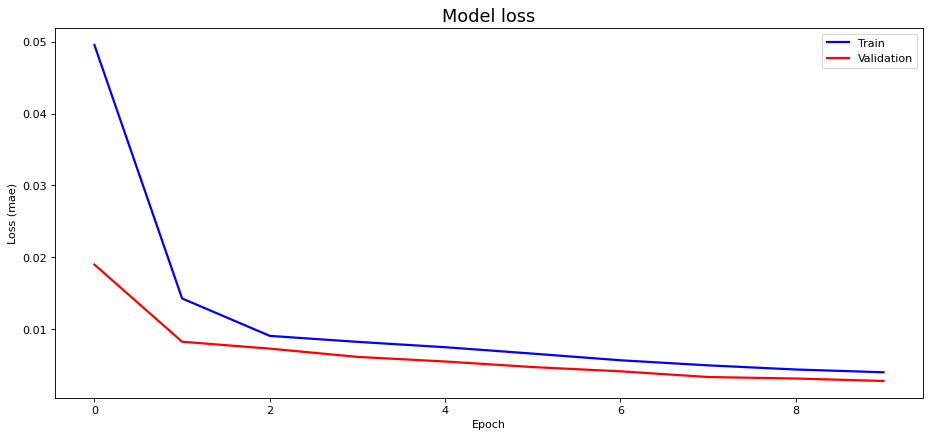

In [14]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [15]:
mse = keras.losses.mae(predictions.reshape(X_train.shape), X_train)
test_losses = keras.losses.mae(predictions_float.reshape(X_test.shape), X_test)
 
plt.hist(train_losses[None,:], bins=50, density=True, alpha=0.75, color='blue')
plt.show()
plt.hist(test_losses[None,:], bins=50, density=True, alpha=0.75, color='blue')
plt.show()

NameError: name 'keras' is not defined

In [126]:
# Assuming you have already trained the LSTM autoencoder and obtained 'mse' for the training data

# Step 2: Calculate Summary Statistics
mean_mse = np.mean(mse)
std_dev_mse = np.std(mse)

print(f"Mean MSE: {mean_mse:.4f}")
print(f"Standard Deviation of MSE: {std_dev_mse:.4f}")

# Step 3: Calculate Z-Scores
z_scores = (mse - mean_mse) / std_dev_mse

# Step 4: Determine a Threshold based on Z-Scores
# You can choose a threshold based on a specific number of standard deviations (e.g., 2 standard deviations)
threshold_z = 2  # Adjust this threshold as needed
anomalies_z = z_scores > threshold_z

# Step 5: Calculate Percentiles and Set a Threshold
percentile_95 = np.percentile(mse, 95)  # You can adjust the percentile as needed
threshold_percentile = percentile_95

# Detect anomalies based on the percentile threshold
anomalies_percentile = mse > threshold_percentile

# Print the number of anomalies detected by each method
print(f"Number of Anomalies (Z-Score): {np.sum(anomalies_z)}")
print(f"Number of Anomalies (Percentile): {np.sum(anomalies_percentile)}")


Mean MSE: 0.1332
Standard Deviation of MSE: 0.2611
Number of Anomalies (Z-Score): 2240
Number of Anomalies (Percentile): 1401


876/876 [==============================] - 16s 18ms/step


C:\Users\ali\AppData\Local\Temp\ipykernel_18632\1958773641.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mse, bins = 50, kde= True, color = 'blue');


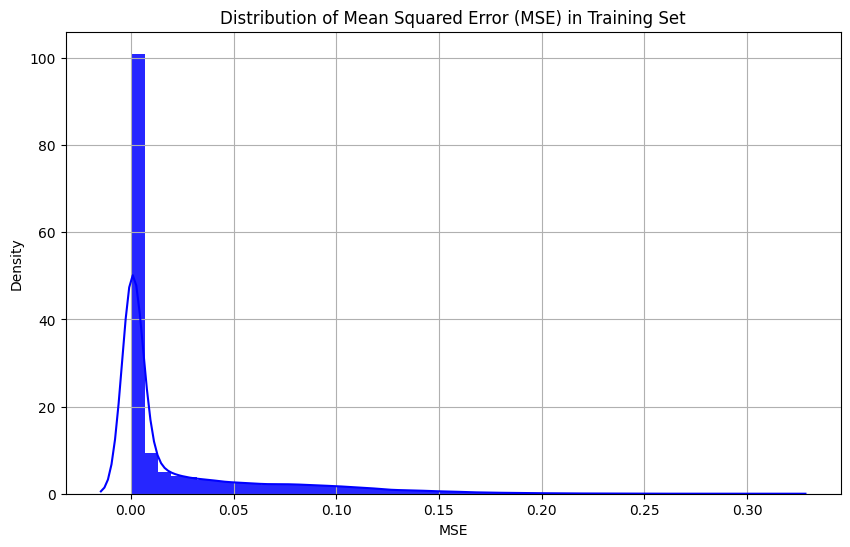

219/219 [==============================] - 5s 21ms/step
[False False False ... False False False]


In [127]:
# Make predictions using the trained autoencoder
predictions = model.predict(X_train)

# Calculate Mean Squared Error (MSE) for each data point in the training set
mse = np.mean(np.abs(X_train - predictions.reshape(X_train.shape)), axis=1)


# Plot the distribution of MSE values
plt.figure(figsize=(10, 6))
plt.hist(mse, bins=50, density=True, alpha=0.75, color='blue')
sns.distplot(mse, bins = 50, kde= True, color = 'blue');
plt.xlabel('MSE')
plt.ylabel('Density')
plt.title('Distribution of Mean Squared Error (MSE) in Training Set')
plt.grid(True)
plt.show()

# Choose a suitable threshold for anomaly detection (e.g., visually or statistically)
threshold = 0.02  # You can adjust this threshold based on the distribution

# Detect anomalies in the testing set based on the threshold
predictions_test = model.predict(X_test)
mse_test = np.mean(np.power(X_test - predictions_test.reshape(X_test.shape), 2), axis=1)
anomalies = mse_test > threshold
print(anomalies)

In [51]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

# Load your dataset into a Pandas DataFrame, replace 'your_data.csv' with your dataset file path
# data = pd.read_csv('your_data.csv')

# Preprocessing the data
# Assuming you have a column named 'timestamp' as the time series index
df_occ['timestamp'] = pd.to_datetime(df_occ['timestamp [dd/mm/yyyy HH:MM]'])
df_occ.set_index('timestamp', inplace=True)
df_occ.index = pd.to_datetime(df_occ['timestamp [dd/mm/yyyy HH:MM]'])
# temp =merged_df['tempOut [C]']
temp =df_occ['ki [0:vacant 1:occupied]']

# Categorize the target variable into classes

def categorize_presence(value):
    if value == 0.0:
        return 0
    else:
        return 1
    

df_occ['presence_category']  = df_occ['ki [0:vacant 1:occupied]'].apply(categorize_presence)

# # Normalize the data
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_occ['occupancy'] = scaler.fit_transform(df_occ['ki [0:vacant 1:occupied]'].values.reshape(-1, 1))

# Create sequences for training the autoencoder
sequence_length = 10  # You can adjust this based on your requirements
sequences = []
for i in range(len(df_occ) - sequence_length):
    sequence = df_occ.iloc[i:i + sequence_length]['presence_category'].values
    sequences.append(sequence)
sequences = np.array(sequences)


# Split the data into training and testing sets
split_ratio = 0.8
train_size = int(len(sequences) * split_ratio)
X_train = sequences[:train_size]
X_test = sequences[train_size:]

# Build the LSTM autoencoder model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(RepeatVector(sequence_length))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, X_train, epochs=10, batch_size=64, validation_data=(X_test, X_test)).history 

# Make predictions using the trained autoencoder
predictions = model.predict(X_test)

# Rescale the predictions to the original scale
# predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

# You can now evaluate the predictions and perform further analysis


Epoch 1/10
438/438 [==============================] - 31s 52ms/step - loss: 0.2512 - accuracy: 0.9076 - val_loss: 0.1453 - val_accuracy: 0.9304
Epoch 2/10
438/438 [==============================] - 21s 49ms/step - loss: 0.1829 - accuracy: 0.9219 - val_loss: 0.1332 - val_accuracy: 0.9333
Epoch 3/10
438/438 [==============================] - 23s 52ms/step - loss: 0.1380 - accuracy: 0.9336 - val_loss: 0.1124 - val_accuracy: 0.9431
Epoch 4/10
438/438 [==============================] - 19s 43ms/step - loss: 0.1166 - accuracy: 0.9440 - val_loss: 0.1735 - val_accuracy: 0.9332
Epoch 5/10
438/438 [==============================] - 19s 42ms/step - loss: 0.1188 - accuracy: 0.9447 - val_loss: 0.0824 - val_accuracy: 0.9625
Epoch 6/10
438/438 [==============================] - 21s 48ms/step - loss: 0.0888 - accuracy: 0.9591 - val_loss: 0.0686 - val_accuracy: 0.9671
Epoch 7/10
438/438 [==============================] - 18s 41ms/step - loss: 0.0694 - accuracy: 0.9691 - val_loss: 0.0692 - val_accuracy:

In [ ]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [16]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

# Load your dataset into a Pandas DataFrame, replace 'your_data.csv' with your dataset file path
# data = pd.read_csv('your_data.csv')

# Preprocessing the data
# Assuming you have a column named 'timestamp' as the time series index
df_occ['timestamp'] = pd.to_datetime(df_occ['timestamp [dd/mm/yyyy HH:MM]'])
df_occ.set_index('timestamp', inplace=True)
df_occ.index = pd.to_datetime(df_occ['timestamp [dd/mm/yyyy HH:MM]'])
# temp =merged_df['tempOut [C]']
temp =df_occ['ki [0:vacant 1:occupied]']

# Categorize the target variable into classes
def categorize_presence(value):
    if value <= 0.25:
        return 0
    elif value <0.5: 
        return 1 
    elif value <0.75:
        return 2
    else:
        return 3
    
df_occ['presence_category']  = df_occ['ki [0:vacant 1:occupied]'].apply(categorize_presence)

# # Normalize the data
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_occ['occupancy'] = scaler.fit_transform(df_occ['ki [0:vacant 1:occupied]'].values.reshape(-1, 1))

# Create sequences for training the autoencoder
sequence_length = 10  # You can adjust this based on your requirements
sequences = []
for i in range(len(df_occ) - sequence_length):
    sequence = df_occ.iloc[i:i + sequence_length]['presence_category'].values
    sequences.append(sequence)
sequences = np.array(sequences)


# # Categorize occupancy values into four categories
# category_thresholds = [0.0, 0.25, 0.5, 0.75, 1.0]
# category_labels = [0, 1, 2, 3]  # Categories 0, 1, 2, and 3
# categorized_sequences = np.digitize(sequences, bins=category_thresholds) - 1

# Split the data into training and testing sets
split_ratio = 0.8
train_size = int(len(sequences) * split_ratio)
X_train = sequences[:train_size]
X_test = sequences[train_size:]

# Build the LSTM autoencoder model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(RepeatVector(sequence_length))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(4, activation='softmax')))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, X_train, epochs=20, batch_size=64, validation_data=(X_test, X_test)).history

# Make predictions using the trained autoencoder
predictions = model.predict(X_test)

# Rescale the predictions to the original scale
# predictions = scaler.inverse_transform(predictions.reshape(-1, 1))


# You can now evaluate the predictions and perform further analysis


Epoch 1/20
438/438 [==============================] - 24s 37ms/step - loss: 0.3708 - accuracy: 0.8916 - val_loss: 0.2110 - val_accuracy: 0.9051
Epoch 2/20
438/438 [==============================] - 12s 26ms/step - loss: 0.2324 - accuracy: 0.9029 - val_loss: 0.1900 - val_accuracy: 0.9130
Epoch 3/20
438/438 [==============================] - 12s 27ms/step - loss: 0.1860 - accuracy: 0.9161 - val_loss: 0.1629 - val_accuracy: 0.9213
Epoch 4/20
438/438 [==============================] - 12s 27ms/step - loss: 0.1583 - accuracy: 0.9275 - val_loss: 0.1405 - val_accuracy: 0.9336
Epoch 5/20
438/438 [==============================] - 12s 26ms/step - loss: 0.1409 - accuracy: 0.9355 - val_loss: 0.1252 - val_accuracy: 0.9418
Epoch 6/20
438/438 [==============================] - 12s 27ms/step - loss: 0.1223 - accuracy: 0.9450 - val_loss: 0.1062 - val_accuracy: 0.9520
Epoch 7/20
438/438 [==============================] - 12s 28ms/step - loss: 0.1108 - accuracy: 0.9507 - val_loss: 0.0986 - val_accuracy:

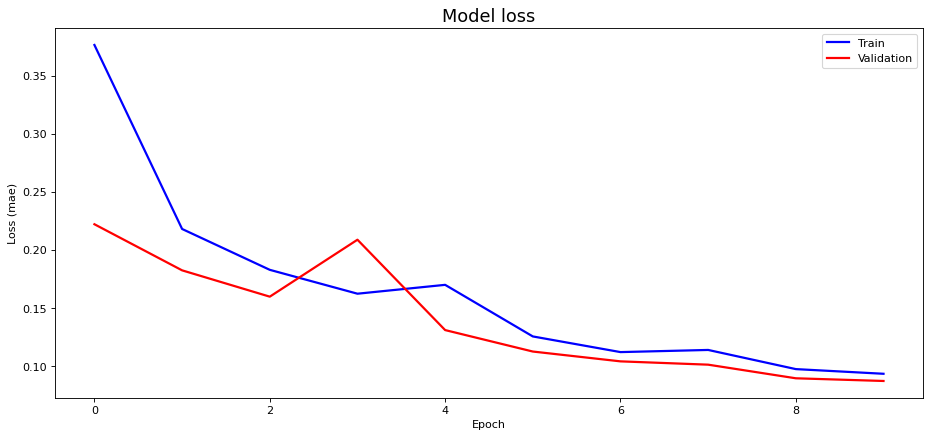

In [62]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already trained your autoencoder model

# Make predictions using the trained autoencoder
predictions = model.predict(X_test)

# Initialize a list to store the MAE losses for each sequence
mae_losses = []

# Calculate the MAE loss for each sequence
for i in range(len(X_test)):
    sequence_mae = np.mean(np.abs(X_test[i] - predictions[i]), axis=1)
    mae_losses.append(sequence_mae)

# Flatten the list of MAE losses
mae_losses = np.concatenate(mae_losses)

# Plot the distribution of MAE losses
plt.figure(figsize=(8, 6))
plt.hist(mae_losses, bins=50, alpha=0.7, color='blue')
plt.xlabel('Mean Absolute Error (MAE) Loss')
plt.ylabel('Frequency')
plt.title('Distribution of MAE Loss')
plt.grid(True)
plt.show()


219/219 [==============================] - 2s 9ms/step


ValueError: operands could not be broadcast together with shapes (10,) (10,4) 

In [64]:
import matplotlib.pyplot as plt

# Train the model and collect loss values
history = model.fit(X_train, X_train, epochs=10, batch_size=64, validation_data=(X_test, X_test))

# Extract the loss values from the training history
loss_values = history.history['loss']

# Plot the loss distribution
plt.figure(figsize=(8, 6))
plt.hist(loss_values, bins=50, color='blue', alpha=0.7)
plt.title('Model Loss Distribution (Training Set)')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.show()


AttributeError: 'dict' object has no attribute 'history'

In [63]:
# plot the loss distribution of the training set
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=train.columns)
X_pred.index = train.index

scored = pd.DataFrame(index=train.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,.5])

876/876 [==============================] - 8s 9ms/step


ValueError: cannot reshape array of size 1120960 into shape (28024,4)

In [56]:
from sklearn.metrics import accuracy_score

# Initialize lists to store flattened predictions and actual values
flat_predictions = []
flat_actuals = []

# Flatten the predictions and actual values sequence by sequence
for i in range(len(X_test)):
    flat_predictions.extend(np.argmax(predictions[i], axis=-1))
    flat_actuals.extend(X_test[i])

# Calculate accuracy
accuracy = accuracy_score(flat_actuals, flat_predictions)
print(f"Accuracy: {accuracy:.2f}")



from sklearn.metrics import confusion_matrix

# # Calculate confusion matrix
# cm = confusion_matrix(X_test.flatten(), [np.argmax(pred, axis=-1) for pred in predictions])
# print("Confusion Matrix:")
# print(cm)

# from sklearn.metrics import classification_report

# # Generate classification report
# report = classification_report(X_test.flatten(), [np.argmax(pred, axis=-1) for pred in predictions])
# print("Classification Report:")
# print(report)

from sklearn.metrics import confusion_matrix, classification_report

# Initialize lists to store results for each sequence
all_actuals = []
all_predictions = []

# Calculate confusion matrix and classification report for each sequence
for i in range(len(X_test)):
    sequence_actuals = X_test[i]
    sequence_predictions = [np.argmax(pred, axis=-1) for pred in predictions[i]]
    
    all_actuals.extend(sequence_actuals)
    all_predictions.extend(sequence_predictions)

# Calculate confusion matrix
cm = confusion_matrix(all_actuals, all_predictions)
print("Confusion Matrix:")
print(cm)

# Generate classification report
report = classification_report(all_actuals, all_predictions)
print("Classification Report:")
print(report)

# from sklearn.metrics import accuracy_score

# # Define the threshold for conversion
# threshold = 0.5

# # Flatten the predictions and actual values, converting them to binary (0 or 1)
# binary_predictions = [1 if pred > threshold else 0 for sequence in predictions for pred in sequence]
# binary_actuals = [1 if actual > 0 else 0 for sequence in X_test for actual in sequence]

# # Calculate accuracy with the adjusted threshold
# accuracy = accuracy_score(binary_actuals, binary_predictions)
# print(f"Accuracy with Threshold {threshold}: {accuracy:.2f}")




# # Vary the threshold (e.g., 0.5) and evaluate performance
# threshold = 0.5
# adjusted_predictions = [1 if pred > threshold else 0 for pred in predictions]

# # Evaluate with the adjusted threshold
# accuracy = accuracy_score(X_test, adjusted_predictions)
# print(f"Accuracy with Threshold {threshold}: {accuracy:.2f}")


# # Print test values and corresponding predictions
# for i in range(len(X_test)):
#     print("Test Value:", X_test[i])
#     print("Predicted Value:", np.argmax(predictions[i], axis=-1))  # Convert softmax output to category
#     print("-" * 50)  # Separator for better readability

# # Create a list to store true/false values based on predictions
# correct_predictions = [np.array_equal(np.argmax(predictions[i], axis=-1), X_test[i]) for i in range(len(X_test))]

# # Plot the results
# plt.figure(figsize=(10, 6))

# # Plot actual values (ground truth)
# plt.plot(X_test[0], label='Actual', linestyle='-', marker='o')

# # Plot predicted values (if true, use a different color)
# for i, correct in enumerate(correct_predictions):
#     color = 'green' if correct else 'red'
#     label = 'Predicted (Correct)' if correct else 'Predicted (Incorrect)'
#     plt.plot(predictions[i][0], label=label, linestyle='--', marker='o', color=color)

# plt.xlabel('Time (Sequence Index)')
# plt.ylabel('Category')
# plt.title('Model Predictions vs. Actual Values')
# plt.legend()
# plt.grid(True)
# plt.show()






Accuracy: 0.97
Confusion Matrix:
[[62044   393   116    27]
 [  812  2787   365    36]
 [  194   160  1286   120]
 [   27     1   196  1496]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     62580
           1       0.83      0.70      0.76      4000
           2       0.66      0.73      0.69      1760
           3       0.89      0.87      0.88      1720

    accuracy                           0.97     70060
   macro avg       0.84      0.82      0.83     70060
weighted avg       0.96      0.97      0.96     70060



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define a list of threshold values to test
thresholds = [0.25, 0.5, 0.75]

# Initialize lists to store results for each threshold
all_actuals = []
all_predictions = []

# Loop through each threshold
for threshold in thresholds:
    print(f"Threshold: {threshold}")
    
    # Calculate predictions with the current threshold
    threshold_predictions = [np.argmax(pred > threshold, axis=-1) for pred in predictions]

    # Initialize lists to store results for each sequence
    sequence_actuals_list = []
    sequence_predictions_list = []

    # Calculate metrics for each sequence
    for i in range(len(X_test)):
        sequence_actuals = X_test[i]
        sequence_predictions = threshold_predictions[i]

        sequence_actuals_list.extend(sequence_actuals)
        sequence_predictions_list.extend(sequence_predictions)

    # Append results for the current threshold to the lists
    all_actuals.append(sequence_actuals_list)
    all_predictions.append(sequence_predictions_list)

    # Calculate and print accuracy for the current threshold
    accuracy = accuracy_score(sequence_actuals_list, sequence_predictions_list)
    print(f"Accuracy: {accuracy:.2f}")

    # Calculate and print confusion matrix for the current threshold
    cm = confusion_matrix(sequence_actuals_list, sequence_predictions_list)
    print("Confusion Matrix:")
    print(cm)

    # Generate and print classification report for the current threshold
    report = classification_report(sequence_actuals_list, sequence_predictions_list)
    print("Classification Report:")
    print(report)
    print("-" * 50)

# You can now analyze and compare the results for different thresholds


Threshold: 0.25
Accuracy: 0.96
Confusion Matrix:
[[62398   130    43     9]
 [ 1290  2507   191    12]
 [  314   310  1083    53]
 [   54    21   326  1319]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     62580
           1       0.84      0.63      0.72      4000
           2       0.66      0.62      0.64      1760
           3       0.95      0.77      0.85      1720

    accuracy                           0.96     70060
   macro avg       0.86      0.75      0.80     70060
weighted avg       0.96      0.96      0.96     70060

--------------------------------------------------
Threshold: 0.5
Accuracy: 0.96
Confusion Matrix:
[[62190   333    41    16]
 [ 1038  2679   259    24]
 [  409    96  1150   105]
 [  156     0   113  1451]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     62580
           1       0.86      0.67      0.75 

In [ ]:
trains_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'train':trains_predictions, 'actuals': Y_train})

train_results

219/219 [==============================] - 1s 3ms/step


,train,actuals
0,0.030427,0.0
1,0.030427,0.0
2,0.030427,0.0
3,0.030427,0.0
4,0.030427,0.0
...,...,...
6999,0.030427,0.0
7000,0.030427,0.0
7001,0.030427,0.0
7002,0.030427,0.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, TimeDistributed, RepeatVector

# Load and preprocess your data
merged_df
# features = merged_df[["ki  [1:closed 0:open]","ki [%]","ki [0:off 1:on]","ki [0:vacant 1:occupied]","ki [C]"]
features = merged_df[["o2 [%]","o2 [0:off 1:on]","o2 [C]","o2 [W]","o2 [W]","rh [%]","tempOut [C]"]]
# features = df_occ[["feature1", "feature2", ...]]
# target = merged_df['ki [0:vacant 1:occupied]']  # Assuming your target column is named "presence"
target = merged_df['o2 [0:vacant 1:occupied]']  # Assuming your target column is named "presence"

print("target shape :", target.shape)
print("features.shape :", features.shape)

# Categorize the target variable into classes
def categorize_presence(value):
    if value == 0:
        return "Low Absence"
    elif value < 0.5:
        return "Medium Absence"
    elif value < 0.8:
        return "Medium Presence"
    else:
        return "High Presence"

merged_df['presence_category'] = target.apply(categorize_presence)

# # Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, merged_df['presence_category'], test_size=0.2, random_state=42)


print("X_train shape :", X_train.shape)
print("X_test.shape :", X_test.shape)
print("y_train.shape :", y_train.shape)
print("y_test.shape :", y_test.shape)

# Normalize features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Determine the sequence length for each sample
sequence_length = 12  # You can adjust this value based on your preference

# Reshape input data for LSTM
n_features = X_train_scaled.shape[1]
X_train_reshaped = np.array([X_train_scaled[i:i+sequence_length] for i in range(len(X_train_scaled) - sequence_length + 1)])
X_test_reshaped = np.array([X_test_scaled[i:i+sequence_length] for i in range(len(X_test_scaled) - sequence_length + 1)])


# Create and compile the LSTM model
model = Sequential()
# model.add(LSTM(units=64, input_shape=(sequence_length, n_features), activation='relu', return_sequences=True))
# model.add(LSTM(units=32, activation='relu'))
# model.add(Dense(len(merged_df['presence_category'].unique()), activation='softmax'))  # Number of unique classes
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.add(LSTM(64, activation='relu', input_shape=(seq_length, 1), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(RepeatVector(seq_length))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Convert categories to one-hot encoding
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert categories to one-hot encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_train_onehot = to_categorical(y_train_encoded)
y_test_onehot = to_categorical(y_test_encoded)

print(y_train_encoded)
print(y_train_onehot)

# Remove extra samples from target data
y_train_onehot = y_train_onehot[:X_train_reshaped.shape[0]]
y_test_onehot = y_test_onehot[:X_test_reshaped.shape[0]]


print("X_train_reshaped shape:", X_train_reshaped.shape)
print("y_train_onehot shape:", y_train_onehot.shape)
print("X_test_reshaped shape:", X_test_reshaped.shape)
print("y_test_onehot shape:", y_test_onehot.shape)


# Train the model
model.fit(X_train_reshaped, y_train_onehot, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test_onehot)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


target shape : (8760,)
features.shape : (8760, 7)
X_train shape : (7008, 7)
X_test.shape : (1752, 7)
y_train.shape : (7008,)
y_test.shape : (1752,)
[0 0 1 ... 0 1 1]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
X_train_reshaped shape: (6997, 12, 7)
y_train_onehot shape: (6997, 4)
X_test_reshaped shape: (1741, 12, 7)
y_test_onehot shape: (1741, 4)
Epoch 1/10
197/197 [==============================] - 11s 27ms/step - loss: 0.8511 - accuracy: 0.7508 - val_loss: 0.7748 - val_accuracy: 0.7429
Epoch 2/10
197/197 [==============================] - 4s 18ms/step - loss: 0.6957 - accuracy: 0.7816 - val_loss: 0.7328 - val_accuracy: 0.7871
Epoch 3/10
197/197 [==============================] - 3s 16ms/step - loss: 0.6658 - accuracy: 0.8004 - val_loss: 0.6931 - val_accuracy: 0.7871
Epoch 4/10
197/197 [==============================] - 3s 17ms/step - loss: 0.6577 - accuracy: 0.8005 - val_loss: 0.6891 - val_accuracy: 0.7943
Epoch 5/10
197/197 [=======

In [ ]:
import pandas as pd 
import numpy as np
import holidays

def filter_work_hour_drop_holidays(merged_df):
    df = merged_df[['timestamp [dd/mm/yyyy HH:MM]', 'ki [0:vacant 1:occupied]']]
    print(df.describe())
    df.info()

    # Convert the timestamp column to a proper datetime format (assuming the column name is 'timestamp')
    df['timestamp'] = pd.to_datetime(df['timestamp [dd/mm/yyyy HH:MM]'])

    # Extract day and hour information from the 'timestamp' column
    # working_hours_df['day'] = df['timestamp'].dt.day
    df['minute'] = df['timestamp'].dt.minute
    df['hour'] = df['timestamp'].dt.hour
    df['day'] = df['timestamp'].dt.day
    df['month'] = df['timestamp'].dt.month
    df['year'] = df['timestamp'].dt.year
    # working_hours_df['hour'] = df['timestamp'].dt.hour

    # Filter the DataFrame to include only rows during working hours (8:00 AM to 6:00 PM)
    df = df[(df['timestamp'].dt.hour >= 8) & (df['timestamp'].dt.hour < 18)]

    # Identify weekends and public holidays in the US
    us_holidays = holidays.US(years=int(df['timestamp'].dt.year.min()), observed=True)
    df['is_weekend'] = df['timestamp'].dt.dayofweek.isin([5, 6])  # 5=Saturday, 6=Sunday
    df['is_public_holiday'] = df['timestamp'].dt.date.isin(us_holidays)

    # Filter out weekends and public holidays from the analysis
    df = df[~(df['is_weekend'] | df['is_public_holiday'])]

    return df

just_time_vs_KiOcc = filter_work_hour_drop_holidays(merged_df)

       ki [0:vacant 1:occupied]
count               8760.000000
mean                   0.086787
std                    0.209535
min                    0.000000
25%                    0.000000
50%                    0.000000
75%                    0.000000
max                    1.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp [dd/mm/yyyy HH:MM]  8760 non-null   object 
 1   ki [0:vacant 1:occupied]      8760 non-null   float64
dtypes: float64(1), object(1)
memory usage: 205.3+ KB


C:\Users\ali\AppData\Local\Temp\ipykernel_5188\70762901.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp [dd/mm/yyyy HH:MM]'])
C:\Users\ali\AppData\Local\Temp\ipykernel_5188\70762901.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['minute'] = df['timestamp'].dt.minute
C:\Users\ali\AppData\Local\Temp\ipykernel_5188\70762901.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [ ]:
# # Replace 'dataset_filename.csv' with the actual filename of your dataset

df_occ = pd.read_csv('01_occ.csv')
df_win = pd.read_csv('02_win.csv')
df_light = pd.read_csv('03_light.csv')
df_plug = pd.read_csv('04_plug.csv')
df_temp_in = pd.read_csv('05_temp_in.csv')
df_rhu_in = pd.read_csv('06_rhu_in.csv')

# print(df_light.filter(like='ki').columns)
# print(df_temp_in.filter(like='ki').columns)


kitchen_df = pd.concat([df_occ['timestamp [dd/mm/yyyy HH:MM]'] , df_occ.filter(like='ki'), df_light.filter(like='ki'), 
                        df_temp_in.filter(like='ki'), df_win.filter(like='ki'), df_rhu_in.filter(like='ki')], axis=1, )
print(kitchen_df)

# # https://youtu.be/tepxdcepTbY
# """
# @author: Sreenivas Bhattiprolu

# Code tested on Tensorflow: 2.2.0
#     Keras: 2.4.3

# dataset: https://finance.yahoo.com/quote/GE/history/
# Also try S&P: https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC
# """

import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime

#Read the csv file

print(kitchen_df.head()) #7 columns, including the Date. 

#Separate dates for future plotting
train_dates = pd.to_datetime(kitchen_df['timestamp [dd/mm/yyyy HH:MM]'])
print(train_dates.tail(15)) #Check last few dates. 

#Variables for training
cols = list(kitchen_df)[1:6]
#Date and volume columns are not used in training. 
print("***", cols) #['Open', 'High', 'Low', 'Close', 'Adj Close']

#New dataframe with only training data - 5 columns
df_for_training = kitchen_df[cols].astype(float)

# df_for_plot=df_for_training.tail(5000)
# df_for_plot.plot.line()

#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

#In my case, trainX has a shape (12809, 14, 5). 
#12809 because we are looking back 14 days (12823 - 14 = 12809). 
#Remember that we cannot look back 14 days until we get to the 15th day. 
#Also, trainY has a shape (12809, 1). Our model only predicts a single value, but 
#it needs multiple variables (5 in my example) to make this prediction. 
#This is why we can only predict a single day after our training, the day after where our data ends.
#To predict more days in future, we need all the 5 variables which we do not have. 
#We need to predict all variables if we want to do that. 

# define the Autoencoder model

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
model.summary()


# fit the model
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()


      timestamp [dd/mm/yyyy HH:MM]  ki [0:vacant 1:occupied]  ki [0:off 1:on]  \
0                 01/01/2013 00:00                       0.0                0   
1                 01/01/2013 00:15                       0.0                0   
2                 01/01/2013 00:30                       0.0                0   
3                 01/01/2013 00:45                       0.0                0   
4                 01/01/2013 01:00                       0.0                0   
...                            ...                       ...              ...   
35035             31/12/2013 22:45                       0.0                0   
35036             31/12/2013 23:00                       0.0                0   
35037             31/12/2013 23:15                       0.0                0   
35038             31/12/2013 23:30                       0.0                0   
35039             31/12/2013 23:45                       0.0                0   

       ki [C]  ki  [1:close

: 

: 

In [ ]:

#Predicting...
#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
#Remember that we can only predict one day in future as our model needs 5 variables
#as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past = 16
n_days_for_prediction=15  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

y_pred_future


[Timestamp('2013-12-31 20:00:00', freq='C'), Timestamp('2014-01-02 20:00:00', freq='C'), Timestamp('2014-01-03 20:00:00', freq='C'), Timestamp('2014-01-06 20:00:00', freq='C'), Timestamp('2014-01-07 20:00:00', freq='C'), Timestamp('2014-01-08 20:00:00', freq='C'), Timestamp('2014-01-09 20:00:00', freq='C'), Timestamp('2014-01-10 20:00:00', freq='C'), Timestamp('2014-01-13 20:00:00', freq='C'), Timestamp('2014-01-14 20:00:00', freq='C'), Timestamp('2014-01-15 20:00:00', freq='C'), Timestamp('2014-01-16 20:00:00', freq='C'), Timestamp('2014-01-17 20:00:00', freq='C'), Timestamp('2014-01-21 20:00:00', freq='C'), Timestamp('2014-01-22 20:00:00', freq='C')]
1/1 [==============================] - 1s 685ms/step


array([0.015915  , 0.01574044, 0.01554952, 0.01564251, 0.01595253,
       0.01587696, 0.01562509, 0.01605429, 0.01604456, 0.01593327,
       0.0164282 , 0.01617087, 0.0159343 , 0.01612539, 0.01630244],
      dtype=float32)

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Function to create input sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# The normalization process should be applied to all the variables that require scaling
# it is essential to scale them to a common range for better model performance: 
# The 'fit_transform' method first calculates the minimum and maximum values of the 'temp','rhu' column to determine the range, 
# and then it scales all the values in the column to the [0, 1] range.

# scaler = MinMaxScaler()
# just_time_vs_KiOcc['ki [C]'] = scaler.fit_transform(just_time_vs_KiOcc[['ki [C]']])
# just_time_vs_KiOcc['ki [%]'] = scaler.fit_transform(just_time_vs_KiOcc[['ki [%]']])


# Normalize the target values to the range [0, 1] using Min-Max scaling
# scaler = MinMaxScaler()
# just_time_vs_KiOcc['ki [0:vacant 1:occupied]'] = scaler.fit_transform(just_time_vs_KiOcc[['ki [0:vacant 1:occupied]']])

# Define the sequence length (number of time steps to use for prediction)
seq_length = 4


# Create sequences for LSTM training
X, y = create_sequences(merged_df['ki [0:vacant 1:occupied]'].values, seq_length)

# Reshape the input data to fit LSTM format (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='RMSprop',metrics=['accuracy'])

# Create the deeper LSTM model
# model = Sequential()
# model.add(LSTM(64, input_shape=(seq_length, 1), return_sequences=True))
# model.add(LSTM(32, 'relu'))
# model.add(Dense(1,'linear'))
# model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

# Make predictions on the test data
y_pred = model.predict(X_test)

# # Inverse transform the predictions and true values to the original scale
# y_pred_inv = scaler.inverse_transform(y_pred)
# y_test_inv = scaler.inverse_transform(y_test)

# Calculate Mean Squared Error (MSE) for evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Epoch 1/50
219/219 - 7s - loss: 0.0351 - accuracy: 0.7533 - 7s/epoch - 34ms/step
Epoch 2/50
219/219 - 1s - loss: 0.0322 - accuracy: 0.7544 - 1s/epoch - 5ms/step
Epoch 3/50
219/219 - 1s - loss: 0.0318 - accuracy: 0.7549 - 1s/epoch - 5ms/step
Epoch 4/50
219/219 - 1s - loss: 0.0317 - accuracy: 0.7536 - 1s/epoch - 5ms/step
Epoch 5/50
219/219 - 1s - loss: 0.0317 - accuracy: 0.7541 - 1s/epoch - 5ms/step
Epoch 6/50
219/219 - 2s - loss: 0.0317 - accuracy: 0.7537 - 2s/epoch - 8ms/step
Epoch 7/50
219/219 - 2s - loss: 0.0316 - accuracy: 0.7540 - 2s/epoch - 7ms/step
Epoch 8/50
219/219 - 2s - loss: 0.0317 - accuracy: 0.7543 - 2s/epoch - 9ms/step
Epoch 9/50
219/219 - 2s - loss: 0.0317 - accuracy: 0.7549 - 2s/epoch - 7ms/step
Epoch 10/50
219/219 - 2s - loss: 0.0316 - accuracy: 0.7541 - 2s/epoch - 7ms/step
Epoch 11/50
219/219 - 2s - loss: 0.0317 - accuracy: 0.7543 - 2s/epoch - 8ms/step
Epoch 12/50
219/219 - 2s - loss: 0.0316 - accuracy: 0.7541 - 2s/epoch - 7ms/step
Epoch 13/50
219/219 - 2s - loss: 0.0

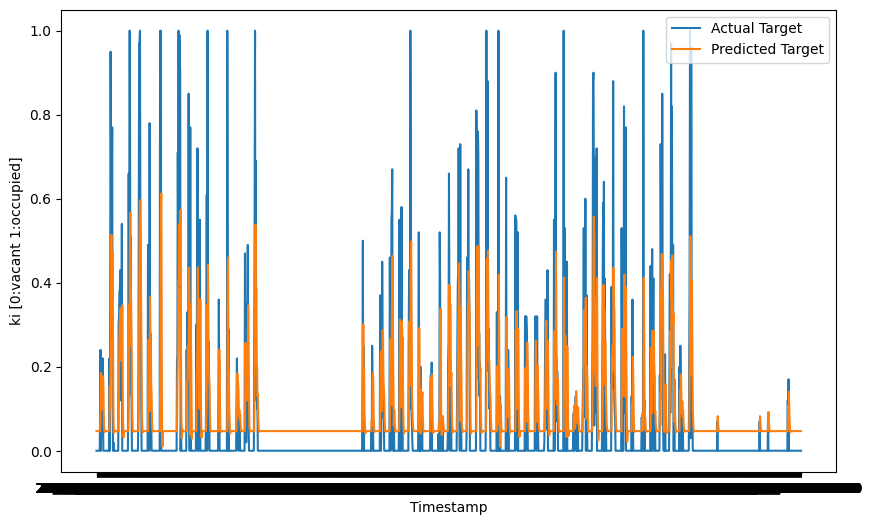

In [ ]:
import matplotlib.pyplot as plt
# # Plot the actual and predicted values on the test data
plt.figure(figsize=(10, 6))
plt.plot(merged_df['timestamp [dd/mm/yyyy HH:MM]'][train_size + seq_length:], y_test, label='Actual Target')
plt.plot(merged_df['timestamp [dd/mm/yyyy HH:MM]'][train_size + seq_length:], y_pred, label='Predicted Target')
plt.xlabel('Timestamp')
plt.ylabel('ki [0:vacant 1:occupied]')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load and preprocess your dataset
# ...

# Function to create input sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(merged_df[['ki [0:vacant 1:occupied]']])

# Define the sequence length (number of time steps to use for prediction)
seq_length = 4

# Create sequences for LSTM training
X, y = create_sequences(scaled_data, seq_length)

# Reshape the input data to fit LSTM format (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(seq_length, scaled_data.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Inverse transform the predictions and true values to the original scale
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Calculate Mean Squared Error (MSE) for evaluation
mse = mean_squared_error(y_test_inv, y_pred_inv)
print("Mean Squared Error (MSE):", mse)


In [27]:
# Using plotly.express
import plotly.graph_objects as px
import plotly.io as pio

# df = px.data.stocks()
fig = px.Figure([px.Scatter(x=merged_df['timestamp [dd/mm/yyyy HH:MM]'], y=merged_df["ki [0:vacant 1:occupied]"])])
fig.show()
pio.write_image(fig, 'timeseries_plot.png', format='png')

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [ ]:
import pandas as pd
import plotly.graph_objects as px
import plotly.io as pio

# Assuming your 'timestamp [dd/mm/yyyy HH:MM]' column is in datetime format
merged_df['timestamp [dd/mm/yyyy HH:MM]'] = pd.to_datetime(merged_df['timestamp [dd/mm/yyyy HH:MM]'])

# Resample the data at 1-hour intervals and calculate the mean
hourly_data = merged_df.resample('24H', on='timestamp [dd/mm/yyyy HH:MM]').mean()

# Using plotly.express
fig = px.Figure([px.Scatter(x=hourly_data.index, y=hourly_data["ki [0:vacant 1:occupied]"])])
fig.show()

# Save the plot as an image
pio.write_image(fig, 'timeseries_plot.png', format='png')


In [36]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

# Assuming your 'timestamp [dd/mm/yyyy HH:MM]' column is in datetime format
merged_df['timestamp [dd/mm/yyyy HH:MM]'] = pd.to_datetime(merged_df['timestamp [dd/mm/yyyy HH:MM]'])

# Resample the data at different intervals
hourly_data = merged_df.resample('1H', on='timestamp [dd/mm/yyyy HH:MM]').mean()
daily_data = merged_df.resample('24H', on='timestamp [dd/mm/yyyy HH:MM]').mean()
weekly_data = merged_df.resample('W', on='timestamp [dd/mm/yyyy HH:MM]').mean()
monthly_data = merged_df.resample('M', on='timestamp [dd/mm/yyyy HH:MM]').mean()

# Create subplots
fig = make_subplots(rows=4, cols=1, shared_xaxes=True)

# Add traces for each aggregated data
fig.add_trace(go.Scatter(x=hourly_data.index, y=hourly_data["ki [0:vacant 1:occupied]"], mode='lines', name='1 Hour'), row=1, col=1)
fig.add_trace(go.Scatter(x=daily_data.index, y=daily_data["ki [0:vacant 1:occupied]"], mode='lines', name='24 Hours'), row=2, col=1)
fig.add_trace(go.Scatter(x=weekly_data.index, y=weekly_data["ki [0:vacant 1:occupied]"], mode='lines', name='Weekly'), row=3, col=1)
fig.add_trace(go.Scatter(x=monthly_data.index, y=monthly_data["ki [0:vacant 1:occupied]"], mode='lines', name='Monthly'), row=4, col=1)

# Update layout
fig.update_layout(title='Occupancy by Different Time Intervals',
                  xaxis_title='Timestamp',
                  yaxis_title='Occupancy')

# Show the figure
fig.show()

# Save the plot as an image
pio.write_image(fig, 'timeseries_plots.png', format='png')


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [1]:

# Create a list of Austrian holidays
at_holidays = holidays.Austria(years=range(2013, 2014))

# Function to check if a date is a holiday or a weekend (Saturday or Sunday)
def is_weekend_or_holiday(date):
    return date.weekday() >= 5 or date in at_holidays

# Assuming your 'timestamp [dd/mm/yyyy HH:MM]' column is in datetime format
merged_df['timestamp [dd/mm/yyyy HH:MM]'] = pd.to_datetime(merged_df['timestamp [dd/mm/yyyy HH:MM]'])

# Apply the mask to filter out weekends and holidays
filterd_holy = merged_df[~merged_df['timestamp [dd/mm/yyyy HH:MM]'].apply(is_weekend_or_holiday)]


NameError: name 'holidays' is not defined

In [9]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import holidays

# Assuming your 'timestamp [dd/mm/yyyy HH:MM]' column is in datetime format
merged_df['timestamp [dd/mm/yyyy HH:MM]'] = pd.to_datetime(merged_df['timestamp [dd/mm/yyyy HH:MM]'])


# Resample the data at different intervals
hourly_data = merged_df.resample('1H', on='timestamp [dd/mm/yyyy HH:MM]').mean()
daily_data = merged_df.resample('24H', on='timestamp [dd/mm/yyyy HH:MM]').mean()
weekly_data = merged_df.resample('W', on='timestamp [dd/mm/yyyy HH:MM]').mean()
monthly_data = merged_df.resample('M', on='timestamp [dd/mm/yyyy HH:MM]').mean()

# Create subplots
fig = make_subplots(rows=4, cols=1, shared_xaxes=True)

# Add traces for each aggregated data
fig.add_trace(go.Scatter(x=hourly_data.index, y=hourly_data["o1_5 [0:vacant 1:occupied]"], mode='lines', name='1 Hour'), row=1, col=1)
fig.add_trace(go.Scatter(x=daily_data.index, y=daily_data["o1_5 [0:vacant 1:occupied]"], mode='lines', name='24 Hours'), row=2, col=1)
fig.add_trace(go.Scatter(x=weekly_data.index, y=weekly_data["o1_5 [0:vacant 1:occupied]"], mode='lines', name='Weekly'), row=3, col=1)
fig.add_trace(go.Scatter(x=monthly_data.index, y=monthly_data["o1_5 [0:vacant 1:occupied]"], mode='lines', name='Monthly'), row=4, col=1)

# Update layout
fig.update_layout(title='Occupancy by Different Time Intervals : ex. Desktop 1_5 ',
                  xaxis_title='Timestamp',
                  yaxis_title='Occupancy')

# Show the figure
fig.show()
import kaleido
# Save the plot as an image
pio.write_image(fig, 'timeseries_plots.png', format='png')


In [15]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import holidays


# Create a list of Austrian holidays
at_holidays = holidays.Austria(years=range(2013, 2014))

# Function to check if a date is a holiday or a weekend (Saturday or Sunday)
def is_weekend_or_holiday(date):
    return date.weekday() >= 5 or date in at_holidays
    # return  date in at_holidays

# Assuming your 'timestamp [dd/mm/yyyy HH:MM]' column is in datetime format
merged_df['timestamp [dd/mm/yyyy HH:MM]'] = pd.to_datetime(merged_df['timestamp [dd/mm/yyyy HH:MM]'])

# Apply the mask to filter out weekends and holidays
merged_df = merged_df[~merged_df['timestamp [dd/mm/yyyy HH:MM]'].apply(is_weekend_or_holiday)]



# Resample the data at different intervals
hourly_data = merged_df.resample('1H', on='timestamp [dd/mm/yyyy HH:MM]').mean()
daily_data = merged_df.resample('24H', on='timestamp [dd/mm/yyyy HH:MM]').mean()
weekly_data = merged_df.resample('W', on='timestamp [dd/mm/yyyy HH:MM]').mean()
monthly_data = merged_df.resample('M', on='timestamp [dd/mm/yyyy HH:MM]').mean()

# Create subplots
fig = make_subplots(rows=4, cols=1, shared_xaxes=True)

# Add traces for each aggregated data
fig.add_trace(go.Scatter(x=hourly_data.index, y=hourly_data["o1_5 [0:vacant 1:occupied]"], mode='lines', name='1 Hour'), row=1, col=1)
fig.add_trace(go.Scatter(x=daily_data.index, y=daily_data["o1_5 [0:vacant 1:occupied]"], mode='lines', name='24 Hours'), row=2, col=1)
fig.add_trace(go.Scatter(x=weekly_data.index, y=weekly_data["o1_5 [0:vacant 1:occupied]"], mode='lines', name='Weekly'), row=3, col=1)
fig.add_trace(go.Scatter(x=monthly_data.index, y=monthly_data["o1_5 [0:vacant 1:occupied]"], mode='lines', name='Monthly'), row=4, col=1)

# Update layout
fig.update_layout(title='Occupancy by Different Time Intervals : ex. Desktop 1_5 ',
                  xaxis_title='Timestamp',
                  yaxis_title='Occupancy')

# Show the figure
fig.show()
import kaleido
# Save the plot as an image
pio.write_image(fig, 'timeseries_plots.png', format='png')
